In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os 
from scipy import stats
from datetime import datetime

In [36]:
# csv_path = "./2. rawdata/"
# os.chdir(csv_path)

# 데이터 불러 오기

In [37]:
#df = pd.read_csv(csv_path +'smart_farm.csv')
raw = pd.read_csv('smart_farm_train.csv')

In [38]:
raw

,Unnamed: 0,smart_farm.yy,smart_farm.mm,smart_farm.dd,smart_farm.hh,smart_farm.nn,smart_farm.insolation,smart_farm.out_tmperature,smart_farm.out_humidity,smart_farm.wind_speed,...,smart_farm.shield_tmperature_h,smart_farm.shield_energy_h,smart_farm.shield_energy_v,smart_farm.exhaust_fan,smart_farm.ceiling,smart_farm.floating_fan,smart_farm.fan_coil_b_site,smart_farm.ventilation_temperature_control,smart_farm.heating_temperature_set_up,smart_farm.heat_supply
0,1,2021,11,26,0,0,-2.7,5.8,67,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2,2021,11,26,0,1,-2.9,5.8,67,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,3,2021,11,26,0,2,-3.0,5.7,67,0.9,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,4,2021,11,26,0,3,-3.0,5.7,67,1.3,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,5,2021,11,26,0,4,-2.8,5.7,67,0.9,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132475,132476,2022,2,28,23,55,-2.7,4.1,51,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
132476,132477,2022,2,28,23,56,-2.7,4.1,52,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
132477,132478,2022,2,28,23,57,-2.7,4.1,52,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
132478,132479,2022,2,28,23,58,-2.6,4.1,52,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8


In [39]:
# unnamed 열 삭제
raw.drop(['Unnamed: 0'], axis = 1, inplace=True)

### 열 이름 변경

In [40]:
# 전체열 변경 안먹혀서 하나씩 변경
colnames = [i[11:] for i in raw.columns]

for i in range(len(colnames)):
    raw.rename(columns = {raw.columns[i] : colnames[i]},inplace = True)

raw.columns

Index(['yy', 'mm', 'dd', 'hh', 'nn', 'insolation', 'out_tmperature',
       'out_humidity', 'wind_speed', 'wind_direction', 'in_tmperature',
       'in_humidity', 'shield_light_h', 'shield_tmperature_h',
       'shield_energy_h', 'shield_energy_v', 'exhaust_fan', 'ceiling',
       'floating_fan', 'fan_coil_b_site', 'ventilation_temperature_control',
       'heating_temperature_set_up', 'heat_supply'],
      dtype='object')

### 시간 열 인덱스로 설정

In [41]:
# 날찌 데이터 문자열로 바꾼 후 time 열 생성
raw.iloc[:, :5] = raw.iloc[:, :5].astype(str)
raw['time'] = raw['yy']+'-'+raw['mm']+'-'+raw['dd']+'-'+raw['hh']+'-'+raw['nn']

In [42]:
# time 열 datetime 타입으로 변경
raw.time = pd.to_datetime(raw.time,format='%Y-%m-%d-%H-%M')
raw = raw.set_index('time')

In [43]:
# 시간대별(분) 평균값 출력
raw.resample(rule='T').mean()

,insolation,out_tmperature,out_humidity,wind_speed,wind_direction,in_tmperature,in_humidity,shield_light_h,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,heat_supply
time,,,,,,,,,,,,,,,,,,
2021-11-26 00:00:00,-2.7,5.8,67.0,0.0,325.0,18.30,62.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2021-11-26 00:01:00,-2.9,5.8,67.0,0.4,344.0,18.10,63.400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2021-11-26 00:02:00,-3.0,5.7,67.0,0.9,105.0,17.70,65.200,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
2021-11-26 00:03:00,-3.0,5.7,67.0,1.3,123.0,17.70,63.900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
2021-11-26 00:04:00,-2.8,5.7,67.0,0.9,123.0,17.60,64.700,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28 23:55:00,-2.7,4.1,51.0,0.0,57.0,18.15,70.560,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
2022-02-28 23:56:00,-2.7,4.1,52.0,0.4,57.0,18.05,72.215,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
2022-02-28 23:57:00,-2.7,4.1,52.0,0.4,40.0,18.20,70.705,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8


### 강수량 데이터 불러오기

In [44]:
rf = pd.read_csv('rainfall_gsnd.csv', encoding='cp949' )

In [45]:
rf = rf[['일시','강수량(mm)']]
rf.columns=['time', 'rainfall']

In [46]:
rf.time = pd.to_datetime(rf.time)
rf = rf.set_index('time')

In [47]:
#시간대별(분) 평균값 출력
rf = rf.resample(rule='T').mean()
rf

,rainfall
time,
2021-11-26 00:00:00,NaN
2021-11-26 00:01:00,NaN
2021-11-26 00:02:00,NaN
2021-11-26 00:03:00,NaN
2021-11-26 00:04:00,NaN
...,...
2022-02-28 22:56:00,NaN
2022-02-28 22:57:00,NaN
2022-02-28 22:58:00,NaN


### 강수량 열 추가

In [48]:
df = raw.join(rf, how='left')
df = df.iloc[:, 5:]
df

,insolation,out_tmperature,out_humidity,wind_speed,wind_direction,in_tmperature,in_humidity,shield_light_h,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,heat_supply,rainfall
time,,,,,,,,,,,,,,,,,,,
2021-11-26 00:00:00,-2.7,5.8,67,0.0,325,18.30,62.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9,NaN
2021-11-26 00:01:00,-2.9,5.8,67,0.4,344,18.10,63.400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9,NaN
2021-11-26 00:02:00,-3.0,5.7,67,0.9,105,17.70,65.200,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9,NaN
2021-11-26 00:03:00,-3.0,5.7,67,1.3,123,17.70,63.900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8,NaN
2021-11-26 00:04:00,-2.8,5.7,67,0.9,123,17.60,64.700,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28 23:55:00,-2.7,4.1,51,0.0,57,18.15,70.560,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9,NaN
2022-02-28 23:56:00,-2.7,4.1,52,0.4,57,18.05,72.215,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8,NaN
2022-02-28 23:57:00,-2.7,4.1,52,0.4,40,18.20,70.705,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132480 entries, 2021-11-26 00:00:00 to 2022-02-28 23:59:00
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   insolation                       132480 non-null  float64
 1   out_tmperature                   132480 non-null  float64
 2   out_humidity                     132480 non-null  int64  
 3   wind_speed                       132480 non-null  float64
 4   wind_direction                   132480 non-null  int64  
 5   in_tmperature                    131968 non-null  float64
 6   in_humidity                      131968 non-null  float64
 7   shield_light_h                   131968 non-null  float64
 8   shield_tmperature_h              131968 non-null  float64
 9   shield_energy_h                  131968 non-null  float64
 10  shield_energy_v                  131968 non-null  float64
 11  exhaust_fan                    

# NULL 처리

In [50]:
def fillna(df):
    # 연속형 변수 결측치 처리
    df['in_tmperature'].fillna(df['in_tmperature'].mean(), inplace=True)
    df['in_humidity'].fillna(df['in_humidity'].mean(), inplace=True)
    df['shield_light_h'].fillna(df['shield_light_h'].mean(), inplace=True)
    df['shield_tmperature_h'].fillna(df['shield_tmperature_h'].mean(), inplace=True)
    df['shield_energy_h'].fillna(df['shield_energy_h'].mean(), inplace=True)
    df['shield_energy_v'].fillna(df['shield_energy_v'].mean(), inplace=True)
    df['ceiling'].fillna(df['ceiling'].mean(), inplace=True)
    df['ventilation_temperature_control'].fillna(df['ventilation_temperature_control'].mean(), inplace=True)
    df['heating_temperature_set_up'].fillna(df['heating_temperature_set_up'].mean(), inplace=True)
    df['heat_supply'].fillna(df['heat_supply'].mean(), inplace=True)
    df['rainfall'].fillna(df['rainfall'].mean(), inplace = True)
    # 범주형 변수 결측치 처리
    df['exhaust_fan'].fillna(0, inplace=True)
    df['floating_fan'].fillna(0, inplace=True)
    df['fan_coil_b_site'].fillna(0, inplace=True)
    return df
fillna(df)
df.isnull().sum()

insolation                         0
out_tmperature                     0
out_humidity                       0
wind_speed                         0
wind_direction                     0
in_tmperature                      0
in_humidity                        0
shield_light_h                     0
shield_tmperature_h                0
shield_energy_h                    0
shield_energy_v                    0
exhaust_fan                        0
ceiling                            0
floating_fan                       0
fan_coil_b_site                    0
ventilation_temperature_control    0
heating_temperature_set_up         0
heat_supply                        0
rainfall                           0
dtype: int64

In [51]:
df

,insolation,out_tmperature,out_humidity,wind_speed,wind_direction,in_tmperature,in_humidity,shield_light_h,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,heat_supply,rainfall
time,,,,,,,,,,,,,,,,,,,
2021-11-26 00:00:00,-2.7,5.8,67,0.0,325,18.30,62.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9,0.370342
2021-11-26 00:01:00,-2.9,5.8,67,0.4,344,18.10,63.400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9,0.370342
2021-11-26 00:02:00,-3.0,5.7,67,0.9,105,17.70,65.200,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9,0.370342
2021-11-26 00:03:00,-3.0,5.7,67,1.3,123,17.70,63.900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8,0.370342
2021-11-26 00:04:00,-2.8,5.7,67,0.9,123,17.60,64.700,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0,0.370342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28 23:55:00,-2.7,4.1,51,0.0,57,18.15,70.560,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9,0.370342
2022-02-28 23:56:00,-2.7,4.1,52,0.4,57,18.05,72.215,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8,0.370342
2022-02-28 23:57:00,-2.7,4.1,52,0.4,40,18.20,70.705,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8,0.370342


# 정규화

In [52]:
min_max_scaler = MinMaxScaler()
min_max_scaler_df = min_max_scaler.fit_transform(df)

# array를 dataframe으로 변경
# 전체열 정규화
df_normal = pd.DataFrame(min_max_scaler_df, columns = df.columns)


# 정규화 한 heat_supply열 .1f 로 만들기
# 열공급량의 이상치를 제거하지 않기 위해 합치지 않음

df_normal1 = list(df_normal.heat_supply)
nor_heat_supply = []

for i in range(len(df_normal1)):
    nor_heat_supply.append(float(format(df_normal1[i],".1f")))
nor_df_heat_supply= pd.DataFrame(data = nor_heat_supply,columns = ["heat_supply"])
nor_df_heat_supply

,heat_supply
0,0.3
1,0.3
2,0.3
3,0.3
4,0.3
...,...
132475,0.3
132476,0.3
132477,0.3
132478,0.3


In [53]:
# 열공급량의 이상치를 제거 하지 않기위해 열공급량 열 제거
df_normal = df_normal.drop(['heat_supply'],axis=1)
df_normal

,insolation,out_tmperature,out_humidity,wind_speed,wind_direction,in_tmperature,in_humidity,shield_light_h,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,rainfall
0,0.003148,0.593156,0.643678,0.000000,0.901408,0.447257,0.485804,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.020166
1,0.002923,0.593156,0.643678,0.024242,0.954930,0.438819,0.507886,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.020166
2,0.002811,0.589354,0.643678,0.054545,0.281690,0.421941,0.536278,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166
3,0.002811,0.589354,0.643678,0.078788,0.332394,0.421941,0.515773,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166
4,0.003035,0.589354,0.643678,0.054545,0.332394,0.417722,0.528391,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132475,0.003148,0.528517,0.459770,0.000000,0.146479,0.440928,0.620820,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166
132476,0.003148,0.528517,0.471264,0.024242,0.146479,0.436709,0.646924,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166
132477,0.003148,0.528517,0.471264,0.024242,0.098592,0.443038,0.623107,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166
132478,0.003260,0.528517,0.471264,0.024242,0.087324,0.447257,0.622871,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166


# 이상값 분석(Z-Score)

In [54]:
threshold = 3

for i in range(len(df_normal.columns)):
    data = df_normal.iloc[:,i]
    data_name = df_normal.columns[i]
    mean = np.mean(data)
    std = np.std(data)
    print(data_name, '의 평균:{:.2f}'.format(mean))
    print( data_name, '의 표준 편차:{:.2f}'.format(std))
    outlier =[]
    for j in data: 
        z = (j - mean)/std 
        if z > threshold:
            outlier.append(j)
    print('이상값은 총', len(outlier), '개')
    
    print('-'*70)

insolation 의 평균:0.16
insolation 의 표준 편차:0.24
이상값은 총 85 개
----------------------------------------------------------------------
out_tmperature 의 평균:0.47
out_tmperature 의 표준 편차:0.20
이상값은 총 0 개
----------------------------------------------------------------------
out_humidity 의 평균:0.47
out_humidity 의 표준 편차:0.23
이상값은 총 0 개
----------------------------------------------------------------------
wind_speed 의 평균:0.08
wind_speed 의 표준 편차:0.09
이상값은 총 2136 개
----------------------------------------------------------------------
wind_direction 의 평균:0.57
wind_direction 의 표준 편차:0.35
이상값은 총 0 개
----------------------------------------------------------------------
in_tmperature 의 평균:0.52
in_tmperature 의 표준 편차:0.17
이상값은 총 0 개
----------------------------------------------------------------------
in_humidity 의 평균:0.63
in_humidity 의 표준 편차:0.14
이상값은 총 0 개
----------------------------------------------------------------------
shield_light_h 의 평균:0.36
shield_light_h 의 표준 편차:0.48
이상값은 총 0 개
---------------

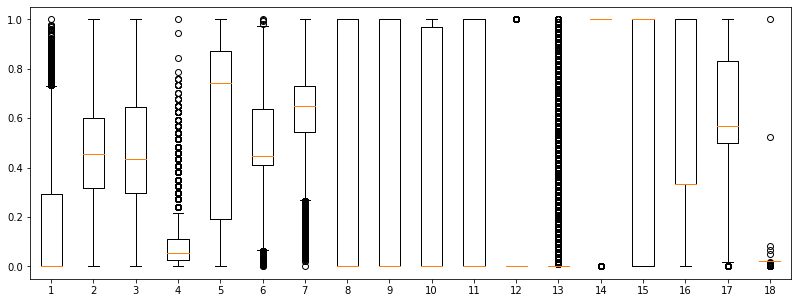

In [55]:
# 이상치 (그래프 확인)
fig = plt.figure(figsize = (30,5))
fig.add_subplot(1,2,2)
plt.boxplot(df_normal)
plt.show()

# 이상치 삭제(NULL 처리)

In [56]:
# 이상치들 결측값으로 변경
zscore_threshold = 3

outlier = stats.zscore(df_normal) > zscore_threshold

df_n = df_normal[~outlier]
df_n

,insolation,out_tmperature,out_humidity,wind_speed,wind_direction,in_tmperature,in_humidity,shield_light_h,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,rainfall
0,0.003148,0.593156,0.643678,0.000000,0.901408,0.447257,0.485804,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.020166
1,0.002923,0.593156,0.643678,0.024242,0.954930,0.438819,0.507886,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.020166
2,0.002811,0.589354,0.643678,0.054545,0.281690,0.421941,0.536278,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166
3,0.002811,0.589354,0.643678,0.078788,0.332394,0.421941,0.515773,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166
4,0.003035,0.589354,0.643678,0.054545,0.332394,0.417722,0.528391,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132475,0.003148,0.528517,0.459770,0.000000,0.146479,0.440928,0.620820,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166
132476,0.003148,0.528517,0.471264,0.024242,0.146479,0.436709,0.646924,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166
132477,0.003148,0.528517,0.471264,0.024242,0.098592,0.443038,0.623107,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166
132478,0.003260,0.528517,0.471264,0.024242,0.087324,0.447257,0.622871,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166


# 합치기

In [57]:
nor_df_heat_supply.head(3)

,heat_supply
0,0.3
1,0.3
2,0.3


In [58]:
print(len(df_n))
print(len(nor_df_heat_supply))

132480
132480


In [59]:
df = df_n.join(nor_df_heat_supply)
print(len(df))
df

132480


,insolation,out_tmperature,out_humidity,wind_speed,wind_direction,in_tmperature,in_humidity,shield_light_h,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,rainfall,heat_supply
0,0.003148,0.593156,0.643678,0.000000,0.901408,0.447257,0.485804,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.020166,0.3
1,0.002923,0.593156,0.643678,0.024242,0.954930,0.438819,0.507886,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.020166,0.3
2,0.002811,0.589354,0.643678,0.054545,0.281690,0.421941,0.536278,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.3
3,0.002811,0.589354,0.643678,0.078788,0.332394,0.421941,0.515773,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.3
4,0.003035,0.589354,0.643678,0.054545,0.332394,0.417722,0.528391,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132475,0.003148,0.528517,0.459770,0.000000,0.146479,0.440928,0.620820,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.3
132476,0.003148,0.528517,0.471264,0.024242,0.146479,0.436709,0.646924,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.3
132477,0.003148,0.528517,0.471264,0.024242,0.098592,0.443038,0.623107,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.3
132478,0.003260,0.528517,0.471264,0.024242,0.087324,0.447257,0.622871,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.3


In [60]:
df_refined = df.dropna(axis=0)
print(df_refined.isnull().sum())

print("="*100)
print("이상치 삭제 전 데이터 수 : ",df.shape)
print("이상치 삭제 후 데이터 수 : ",df_refined.shape)

insolation                         0
out_tmperature                     0
out_humidity                       0
wind_speed                         0
wind_direction                     0
in_tmperature                      0
in_humidity                        0
shield_light_h                     0
shield_tmperature_h                0
shield_energy_h                    0
shield_energy_v                    0
exhaust_fan                        0
ceiling                            0
floating_fan                       0
fan_coil_b_site                    0
ventilation_temperature_control    0
heating_temperature_set_up         0
rainfall                           0
heat_supply                        0
dtype: int64
이상치 삭제 전 데이터 수 :  (132480, 19)
이상치 삭제 후 데이터 수 :  (120521, 19)


In [61]:
df_refined.to_csv('smart_farm_f_refined.csv')

# 필터

In [62]:
arr1 = list(set(df_refined.heat_supply))
arr1.sort()
print(len(arr1))
for i in range(len(arr1)):
    mask = df_refined.heat_supply == arr1[i]
    globals()["df_{}".format(i)] = df_refined.loc[mask,:]
    print('df_{} : '.format(i), globals()['df_{}'.format(i)])
    globals()['df_{}'.format(i)].to_csv('smart_farm_y{}.csv'.format(i))

11
df_0 :          insolation  out_tmperature  out_humidity  wind_speed  wind_direction  \
32        0.002248        0.555133      0.701149    0.078788        0.907042   
38        0.002248        0.551331      0.701149    0.000000        0.771831   
45        0.002473        0.543726      0.701149    0.000000        0.752113   
46        0.002698        0.539924      0.701149    0.000000        0.752113   
48        0.002811        0.539924      0.701149    0.000000        0.752113   
...            ...             ...           ...         ...             ...   
132430    0.002811        0.570342      0.425287    0.000000        0.146479   
132438    0.002698        0.566540      0.448276    0.000000        0.146479   
132451    0.002923        0.555133      0.448276    0.000000        0.146479   
132460    0.003035        0.551331      0.448276    0.024242        0.146479   
132462    0.002923        0.547529      0.448276    0.000000        0.146479   

        in_tmperature  in_hu

df_2 :          insolation  out_tmperature  out_humidity  wind_speed  wind_direction  \
50        0.002361        0.536122      0.712644    0.000000        0.752113   
57        0.002248        0.528517      0.735632    0.000000        0.752113   
115       0.002586        0.471483      0.793103    0.000000        0.726761   
138       0.002024        0.467681      0.804598    0.000000        0.726761   
139       0.002024        0.463878      0.804598    0.000000        0.726761   
...            ...             ...           ...         ...             ...   
132470    0.002586        0.536122      0.448276    0.024242        0.146479   
132471    0.002586        0.536122      0.448276    0.000000        0.146479   
132472    0.002698        0.532319      0.448276    0.000000        0.146479   
132473    0.002811        0.532319      0.459770    0.024242        0.146479   
132474    0.002923        0.532319      0.471264    0.024242        0.146479   

        in_tmperature  in_humid

df_5 :          insolation  out_tmperature  out_humidity  wind_speed  wind_direction  \
349       0.001686        0.406844      0.804598    0.000000        0.743662   
1033      0.008881        0.836502      0.160920    0.078788        0.721127   
1097      0.002248        0.741445      0.275862    0.054545        0.856338   
1158      0.002361        0.653992      0.390805    0.000000        0.780282   
1159      0.002248        0.653992      0.390805    0.024242        0.780282   
...            ...             ...           ...         ...             ...   
129519    0.004272        0.684411      0.551724    0.078788        0.414085   
129565    0.003710        0.669202      0.574713    0.133333        0.405634   
130830    0.002698        0.600760      0.287356    0.054545        0.380282   
130831    0.003148        0.604563      0.275862    0.078788        0.518310   
132370    0.002136        0.650190      0.298851    0.000000        0.236620   

        in_tmperature  in_humid

In [63]:
df_0.head()

,insolation,out_tmperature,out_humidity,wind_speed,wind_direction,in_tmperature,in_humidity,shield_light_h,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,rainfall,heat_supply
32,0.002248,0.555133,0.701149,0.078788,0.907042,0.421941,0.514196,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.0
38,0.002248,0.551331,0.701149,0.000000,0.771831,0.459916,0.446372,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.020166,0.0
45,0.002473,0.543726,0.701149,0.000000,0.752113,0.426160,0.482650,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.0
46,0.002698,0.539924,0.701149,0.000000,0.752113,0.426160,0.490536,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.0
48,0.002811,0.539924,0.701149,0.000000,0.752113,0.430380,0.493691,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.0


In [64]:
# 사용하기 위해 저장(필요시)   ---   위에서 저장함

In [65]:
df_0.to_csv('smart_farm_y0.csv')

In [66]:
df_0

,insolation,out_tmperature,out_humidity,wind_speed,wind_direction,in_tmperature,in_humidity,shield_light_h,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,rainfall,heat_supply
32,0.002248,0.555133,0.701149,0.078788,0.907042,0.421941,0.514196,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.0
38,0.002248,0.551331,0.701149,0.000000,0.771831,0.459916,0.446372,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.020166,0.0
45,0.002473,0.543726,0.701149,0.000000,0.752113,0.426160,0.482650,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.0
46,0.002698,0.539924,0.701149,0.000000,0.752113,0.426160,0.490536,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.0
48,0.002811,0.539924,0.701149,0.000000,0.752113,0.430380,0.493691,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132430,0.002811,0.570342,0.425287,0.000000,0.146479,0.434599,0.672240,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.0
132438,0.002698,0.566540,0.448276,0.000000,0.146479,0.430380,0.665300,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.0
132451,0.002923,0.555133,0.448276,0.000000,0.146479,0.453586,0.629338,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.020166,0.0
132460,0.003035,0.551331,0.448276,0.024242,0.146479,0.428270,0.663013,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.0


In [68]:
df_test = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10], axis = 0)
df_test

,insolation,out_tmperature,out_humidity,wind_speed,wind_direction,in_tmperature,in_humidity,shield_light_h,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,rainfall,heat_supply
256,0.001911,0.433460,0.827586,0.054545,0.726761,0.434599,0.424290,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.500000,0.020166,0.1
259,0.001799,0.437262,0.816092,0.000000,0.740845,0.447257,0.403785,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.500000,0.020166,0.1
260,0.001686,0.437262,0.816092,0.024242,0.738028,0.447257,0.411672,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.500000,0.020166,0.1
261,0.001911,0.441065,0.804598,0.000000,0.738028,0.459916,0.397476,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.500000,0.020166,0.1
262,0.002024,0.441065,0.804598,0.000000,0.738028,0.455696,0.394322,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.500000,0.020166,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125119,0.002586,0.380228,0.252874,0.078788,0.873239,0.198312,0.840694,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.016667,0.020166,0.9
127840,0.001799,0.733840,0.218391,0.024242,0.791549,0.451477,0.806309,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.550000,0.020166,0.9
127841,0.001349,0.730038,0.218391,0.109091,0.588732,0.449367,0.799369,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.550000,0.020166,0.9
127842,0.001461,0.730038,0.218391,0.078788,0.650704,0.447257,0.820347,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.533333,0.020166,0.9


In [70]:
# 원본값중 0.1~1.0 사이 DB
df_test.to_csv('smart_farm_y_test.csv')
df_test.shape

(80138, 19)

In [34]:
pd.read_csv("smart_farm_y1.csv")

,Unnamed: 0,insolation,out_tmperature,out_humidity,wind_speed,wind_direction,in_tmperature,in_humidity,shield_light_h,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,rainfall,heat_supply
0,256,0.001911,0.433460,0.827586,0.054545,0.726761,0.434599,0.424290,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.1
1,259,0.001799,0.437262,0.816092,0.000000,0.740845,0.447257,0.403785,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.1
2,260,0.001686,0.437262,0.816092,0.024242,0.738028,0.447257,0.411672,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,0.020166,0.1
3,261,0.001911,0.441065,0.804598,0.000000,0.738028,0.459916,0.397476,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.020166,0.1
4,262,0.002024,0.441065,0.804598,0.000000,0.738028,0.455696,0.394322,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.020166,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24550,132456,0.002698,0.551331,0.459770,0.000000,0.146479,0.443038,0.646136,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.020166,0.1
24551,132457,0.002811,0.551331,0.448276,0.000000,0.146479,0.440928,0.644479,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.020166,0.1
24552,132458,0.002923,0.551331,0.448276,0.000000,0.146479,0.438819,0.644085,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.020166,0.1
24553,132459,0.003035,0.551331,0.448276,0.024242,0.146479,0.432489,0.670584,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.020166,0.1
